# Find the accuracy, mse, mae using KNN & Linear Regression  algorithm. Make a barplot using these values.


In [59]:
import pandas as pd        
import warnings
warnings.filterwarnings("ignore")
df1 = pd.read_excel('insurance.xlsx')
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
df1.columns[df.isna().any()]

Index([], dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()

for column in df.columns:
    if df1[column].dtype == np.object:
        df1[column] = le.fit_transform(df1[column])

df1.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [62]:
x = df1.drop('sex',axis=1)
y = df1[['sex']]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =  train_test_split(x,y,test_size=0.3,random_state=5)

# KNN Classification

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,p=1,weights='distance')
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [64]:
ypredk = knn.predict(xtest)
ypredk

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,

In [68]:
ytestk = np.ravel(ytest)
df_pred = pd.DataFrame({'Actual': ytestk, 'Prediction': ypredk,})
df_pred.head()

,Actual,Prediction
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [69]:
knn_accuracy = knn.score(xtest,ytest)
knn_accuracy

0.6965174129353234

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
knn_mse = mean_squared_error(ytest,ypredk)
knn_mse

0.3034825870646766

In [71]:
knn_mae = mean_absolute_error(ytest,ypredk)
knn_mae

0.3034825870646766

# Linear Regression

In [72]:
x2 = df1.drop('charges',axis=1)
y2 = df1[['charges']]
xtrain2,xtest2,ytrain2,ytest2 =  train_test_split(x2,y2,test_size=0.3,random_state=5)

from sklearn.linear_model import LinearRegression
li = LinearRegression()
li.fit(xtrain2, ytrain2)

LinearRegression()

In [73]:
ypredl = li.predict(xtest2)
ypredl

array([[ 2812.9783187 ],
       [28003.9431294 ],
       [11641.21899878],
       [ 4803.26570367],
       [ 8527.60628887],
       [35564.01662571],
       [11667.14768055],
       [11537.86884315],
       [ 8528.98467807],
       [10876.33769211],
       [15361.65163122],
       [11017.09759765],
       [ 5129.37047119],
       [ 9155.79306485],
       [ 8453.11211396],
       [ 9154.14178028],
       [32174.30151291],
       [12682.126851  ],
       [13491.86473327],
       [ 7681.89657901],
       [29333.66019259],
       [ 1911.04284324],
       [ 2869.85089652],
       [ 3995.29193048],
       [ 2831.00579376],
       [ 9383.29325355],
       [37485.83675916],
       [17126.17026189],
       [10705.6341586 ],
       [14089.57698985],
       [13343.55281684],
       [  813.08799459],
       [ 5625.21948895],
       [11018.16438135],
       [31813.43016461],
       [ 4206.49520554],
       [ 6409.40952464],
       [ 2624.3779738 ],
       [ 6457.00862721],
       [ 5912.90477914],


In [74]:
ytestl = np.ravel(ytest2)
ypredl = np.ravel(ypredl)
df_pred = pd.DataFrame({'Actual': ytestl, 'Prediction': ypredl, 'Difference': abs(ytestl-ypredl)})
df_pred.head()

,Actual,Prediction,Difference
0,2203.47185,2812.978319,609.506469
1,18648.42170,28003.943129,9355.521429
2,11305.93455,11641.218999,335.284449
3,2166.73200,4803.265704,2636.533704
4,5245.22690,8527.606289,3282.379389


In [77]:
li_accuracy = li.score(xtest2,ytest2)
li_accuracy

0.7574825064531081

In [78]:
li_mse = mean_squared_error(ytest2,ypredl)
li_mse

34483231.45796222

In [79]:
li_mae = mean_absolute_error(ytest2,ypredl)
li_mae

4063.4311461869283

# Barplot using these values

In [83]:
models = ['KNN', 'Linear Regression']
mae_scores = [knn_mae, li_mae]
mse_scores = [knn_mse, li_mse]
accuracy_scores = [knn_accuracy, li_accuracy]
data = {'Model': models, 'MAE': mae_scores, 'MSE': mse_scores, 'Accuracy': accuracy_scores}
new_df = pd.DataFrame(data)
new_df

,Model,MAE,MSE,Accuracy
0,KNN,0.303483,3.034826e-01,0.696517
1,Linear Regression,4063.431146,3.448323e+07,0.757483


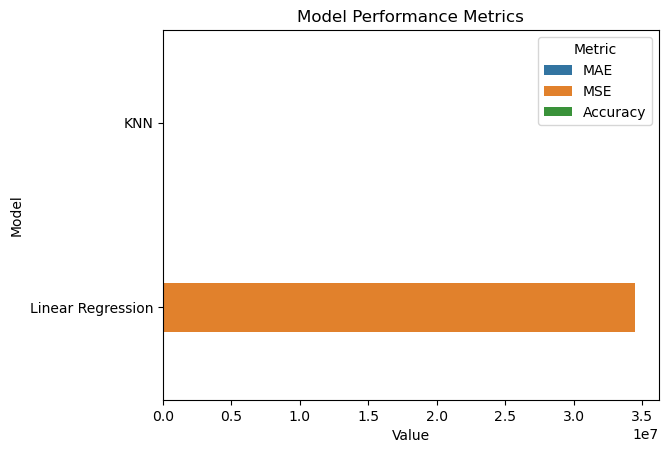

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
df_plot = new_df.melt('Model', var_name='Metric', value_name='Value')
sns.barplot(x='Value', y='Model', hue='Metric', data=df_plot)
plt.title('Model Performance Metrics')
plt.xlabel('Value')
plt.ylabel('Model')
plt.show()